Directory:
C:\Users\adarcher\Downloads\rastermap-master\rastermap-master\rastermap
File shape:
(824, 67502)
time; iteration;  explained PC variance
0.00s     0        0.0070
0.01s    10        0.0355
0.02s    20        0.0422
0.03s    30        0.0557
0.04s    40        0.0478
0.05s    50        0.0477
0.05s   final      0.0476
0.05s upsampled    0.0499
time; iteration;  explained PC variance
0.00s     0        0.0070
0.01s    10        0.0355
0.02s    20        0.0422
0.03s    30        0.0557
0.04s    40        0.0478
0.05s    50        0.0477
0.06s   final      0.0476
0.06s upsampled    0.0499


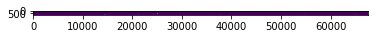

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/adarcher/Downloads/rastermap-master/rastermap-master/rastermap'
os.chdir(path)
print('Directory:')
print(os.getcwd())
from mapping import Rastermap

# >> from pip <<
from rastermap import Rastermap

model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

# fit does not return anything, it adds attributes to model
# attributes: embedding, u, s, v, isort1

sp = np.load('C:/Users/adarcher/Desktop/suite2p/plane0/spks.npy')
print('File shape:')
print(sp.shape)
model.fit(sp)


plt.imshow(sp[model.isort1, :])

# fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

# transform can be used on new samples with the same number of features as sp
#embed2 = model.transform(sp2)